In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import math
import netCDF4 as nc
# import fnmatch
# import os
import kuka_utils as u
# from datetime import datetime
# from datetime import timedelta
# import sys
from matplotlib.pyplot import cm
import cartopy.crs as ccrs
import cartopy as cartopy




In [2]:
# file_path = '/Volumes/bigLacie/processed_stare/'
file_path = '/Volumes/bigLacie/processed_stare_new_nrcs/'
date_list = ['20191107','20191114','20191220','20191226',
             '20200102','20200107','20200109',
             '20200112','20200116',
             '20200119','20200123','20200124','20200129','20200130']

band = ['Ku', 'Ka']
pols = ['vv','vh','hv','hh']
threshold =  0.0001
vreduc = .8 

#set coords where transects are
areas = u.areas()


20191107 [0.    0.    0.502 1.   ]
20191114 [0.         0.1064663  0.67400145 1.        ]
20191220 [0.         0.84436857 1.         1.        ]
20191226 [0.         0.9804     0.53220254 1.        ]
20200102 [0.34966378 0.82275257 0.         1.        ]
20200109 [0.64321038 1.         0.15614114 1.        ]
20200112 [1.         0.94204673 0.         1.        ]
20200116 [1.         0.69730938 0.05126417 1.        ]
20200119 [1.         0.07459916 0.         1.        ]
20200123 [0.81119041 0.09439283 1.         1.        ]
20200124 [0.93190161 0.55467993 0.94127493 1.        ]
20200130 [0.9961 0.9725 0.9961 1.    ]


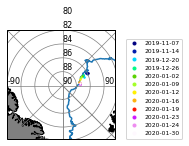

In [3]:
#make Arctic map plot

pfile_path = '/Users/rosie/Documents/mosaic/mosaic_data/ship/'

pos = pd.read_csv(pfile_path+'data2', sep='\t',skipinitialspace=True,skiprows=1,engine='python')
pos = pd.DataFrame(pos).to_numpy()

fin = 8037

ship_lat = pos[:fin, 1]
ship_lon = pos[:fin, 2]

ship_time = pos[:fin, 0]

date_list = ['20191107',
                  '20191114',
                  '20191220',
                  '20191226',
                  '20200102',
                  '20200109',
                  '20200112',
                  '20200116',
                  '20200119',
                  '20200123',
                  '20200124',
                  '20200130']#,
color=cm.gist_ncar(np.linspace(0,1,len(date_list)))

fig, ax = plt.subplots(1, 1, figsize = (2,2), subplot_kw = {'projection': ccrs.NorthPolarStereo()})

ax.plot(ship_lon, ship_lat, transform=ccrs.PlateCarree() )

for date in date_list:
    c = color[np.where(np.array(date_list) == date)[0][0]]
    print(date, c)
    x = np.where(ship_time == date[0:4] + '-' + date[4:6] + '-' + date[6:8] + 'T12:00:00.000')[0]
    label = date[0:4]+ '-' + date[4:6] + '-' + date[6:8]
    ax.plot(ship_lon[x], ship_lat[x], '.', markersize = 3, c = c, transform=ccrs.PlateCarree(), label = label)

ax.set_extent([-180, 180, 90, 82], ccrs.PlateCarree())

ax.coastlines(color = 'k', resolution='10m')
ax.add_feature(cartopy.feature.LAND.with_scale('10m'), facecolor='grey')
lat_plot_lines = np.arange(7)*2+78
lon_plot_lines = np.arange(10)*45

tsize = 8
for l in lat_plot_lines[1:]:
    ax.text(180, l, str(int(l)), c = 'k', size = tsize, ha = 'left', va = 'bottom', transform=ccrs.PlateCarree())
for lat_plot in lat_plot_lines:
    ax.plot(np.arange(360), np.full(360, lat_plot), 'grey', transform=ccrs.PlateCarree(), linewidth = .7)
for lon_plot in lon_plot_lines:
    ax.plot([lon_plot, lon_plot], [0, 90], 'grey', transform=ccrs.PlateCarree(), linewidth = .7)

ax.text(90, 84, str(int(90)), c = 'k', size = tsize, ha = 'left', va = 'bottom', transform=ccrs.PlateCarree())
ax.text(-90, 84, str(int(-90)), c = 'k', size = tsize, ha = 'right', va = 'bottom', transform=ccrs.PlateCarree())

lgd = plt.legend(markerscale = 2, loc = (1.1, 0.), prop={'size': 6})#facecolor = 'grey', )

plt.savefig('/Users/rosie/Documents/papers/mac_rosie_mosaic/transect_locs.jpg', 
            bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 600)

plt.show()

In [4]:


als_path = '/Users/rosie/Documents/mosaic/mosaic_data/20200116Lidar/'
als_file = 'awi-mosaic-l4-als-vq580-stere-0p50m-20200116T063418-20200116T075650-fv2p0.nc'
ds = nc.Dataset(als_path + als_file)
als_x = np.array(ds['xc'][:])
als_y = np.array(ds['yc'][:])
elev = np.array(ds['elevation'][:])

xstart = -1500
xstop = 1500
ystart = -1500
ystop = 1500

keepx = np.where((als_x < xstop) & (als_x > xstart))[0]
keepy = np.where((als_y < ystop) & (als_y > ystart))[0]

# ds.close()

//anaconda3/envs/icesat2/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
//anaconda3/envs/icesat2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
//anaconda3/envs/icesat2/lib/python3.7/site-packages/ipykern

band:  Ku
date: 20191107
date: 20191114
date: 20191220
date: 20191226
date: 20200102
date: 20200109
date: 20200112
date: 20200116
date: 20200119
date: 20200123
date: 20200124
date: 20200130
band:  Ka
date: 20191107
date: 20191114
date: 20191220
date: 20191226
date: 20200102
date: 20200109
date: 20200112
date: 20200116
date: 20200119
date: 20200123
date: 20200124
date: 20200130
lims (-1410.7093476709713, 858.3114724633539) (-545.0069738870129, 1032.9062988242038)
North
South
Runway
Mini
Lead


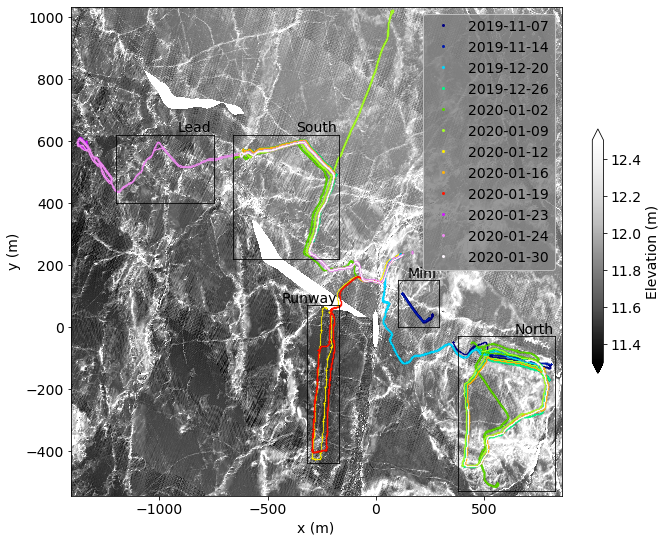

In [9]:
# plot out the KuKa locations for all dates with legend - NEW WITH ALS
date_list_plot = ['20191107',
                  '20191114',
                  '20191220',
                  '20191226',
                  '20200102',
                  '20200109',
                  '20200112',
                  '20200116',
                  '20200119',
                  '20200123',
                  '20200124',
                  '20200130']
color=cm.gist_ncar(np.linspace(0,1,len(date_list_plot)))

plt.rcParams['font.size'] = '14'
f = plt.figure(figsize = (11,9))

als = plt.pcolormesh(als_y[keepy], als_x[keepx],
           np.rot90(elev[keepy[0]:keepy[-1], keepx[0]:keepx[-1]], k=3), 
           vmin = 11.3, vmax = 12.5, cmap = 'Greys_r')

plt.colorbar(als, label = 'Elevation (m)', shrink = .5, extend = 'both')

for b in ['Ku', 'Ka']:
    print('band: ',b)
    x = []
    y = []
    for date in date_list_plot:#[0:1]:
        print('date:',date)
        if (b != 'Ka') | (date != '20200112'):
            file_list = file_path + '/x_y_p/x_y_p_'+date+'_'+b+'.p'
            x_y_p = pickle.load( open( file_path + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )
            c = color[np.where(np.array(date_list_plot) == date)[0][0]]
            label = date[0:4]+ '-' + date[4:6] + '-' + date[6:8]
            if b == 'Ku':
                plt.plot(x_y_p['x'], x_y_p['y'], '.', markersize = .2,
                         c = c, label = label)
            else:
                plt.plot(x_y_p['x'], x_y_p['y'], '.', markersize = .2,
                         c = c)
            x.extend(x_y_p['x'])
            y.extend(x_y_p['y'])
    xy = {'x':x, 'y':y}
    pickle.dump(xy, open(file_path + '/x_y_p/x_y_all_' + b + '.p', 'wb'))
offset = 30
xlim = min(x)-30, max(x)+50
ylim = min(y)-30, max(y)+10
plt.xlim(xlim)
plt.ylim(ylim)
print('lims', xlim, ylim)
plt.xlabel('x (m)')
plt.ylabel('y (m)')


acol = 'k'
awidth = .8
for key in areas:
    print(key)
    plt.plot(areas[key]['x'][0:2], [areas[key]['y'][0],areas[key]['y'][0]], color = acol, linewidth = awidth)
    plt.plot(areas[key]['x'][0:2], [areas[key]['y'][1],areas[key]['y'][1]] , color = acol, linewidth = awidth)
    plt.plot([areas[key]['x'][0],areas[key]['x'][0]], areas[key]['y'][0:2] , color = acol, linewidth = awidth)
    plt.plot([areas[key]['x'][1],areas[key]['x'][1]], areas[key]['y'][0:2] , color = acol, linewidth = awidth)
    plt.text(areas[key]['x'][1]-10, areas[key]['y'][1]+10, key, ha = 'right')

lgd = plt.legend(markerscale = 20, facecolor = 'grey')

plt.savefig('/Users/rosie/Documents/papers/mac_rosie_mosaic/kuka_map_ALS.jpg',
            bbox_extra_artists=(lgd,), 
            bbox_inches='tight', 
            dpi = 300) 
plt.show()

